# Excitation - Inhibition Success Range 

In [6]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [7]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = 'efa0a27d18c333fb9be5ffaf957cadd91cd66505'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

In [8]:
from network import Protocol, BCPNNFast, NetworkManager
from analysis_functions import calculate_recall_success_sequences
from connectivity_functions import create_artificial_manager 
from analysis_functions import calculate_excitation_inhibition_ratio, calculate_excitation, calculate_inhibition

## Excitation - Inhibtion Range

In [66]:
# Patterns parameters
hypercolumns = 4
minicolumns = 30
n_patterns = 10

dt = 0.001


beta = False
value = 3
inhibition = -1.0
extension = 2
decay_factor = 0.1
sequence_decay = 0.0
ampa = True


tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0

T_recall = 5.0
T_cue = 0.100
n = 10

In [67]:
sequences = [[i for i in range(n_patterns)]]

excitation_range = np.arange(1, 36, 3)
inhibition_range = np.arange(1, 12, 1)

success_matrix = np.zeros((excitation_range.size, inhibition_range.size))

for value_index, value in enumerate(excitation_range):
    print(value_index)
    for inhibition_index, inhibition in enumerate(inhibition_range):

        manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, -inhibition, extension, decay_factor,
                                            sequence_decay, dt, BCPNNFast, NetworkManager, ampa, beta)

        success = calculate_recall_success_sequences(manager, T_recall, T_cue, n, sequences)[0]
        success_matrix[value_index, inhibition_index] = success


0
1
2
3
4
5
6
7
8
9
10
11


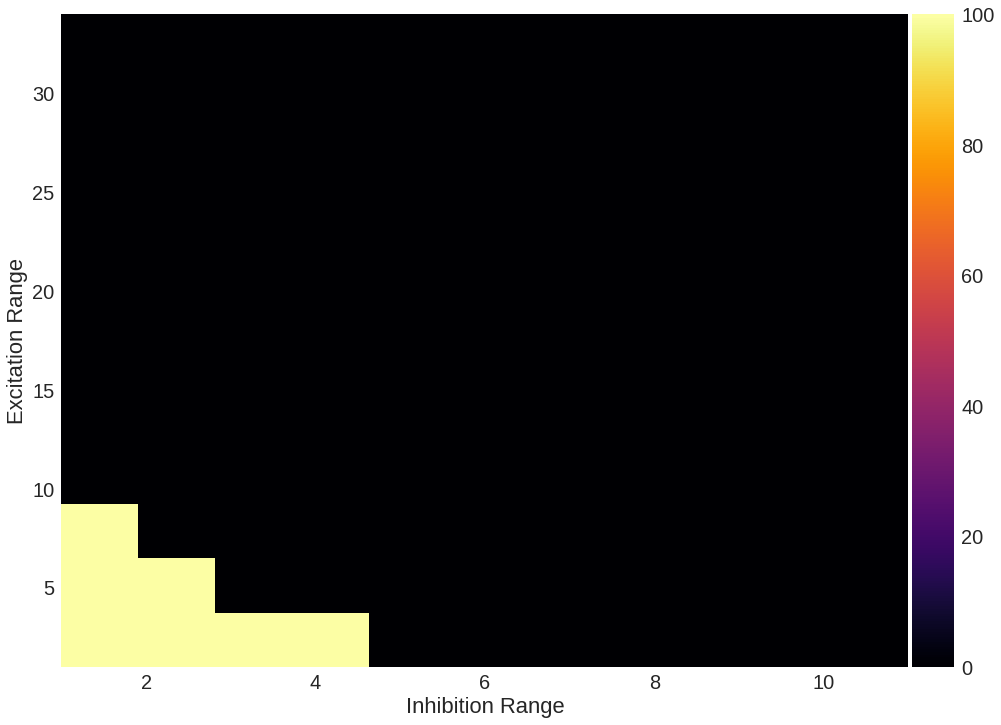

In [68]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

cmap = 'inferno'

extent = [inhibition_range[0], inhibition_range[-1], excitation_range[0], excitation_range[-1]]
im = ax.imshow(success_matrix, origin='lower', cmap=cmap, interpolation='None', extent=extent, aspect='auto')
# im = ax.imshow(success_matrix, origin='lower', cmap=cmap, interpolation='None', aspect='auto')

ax.set_xlabel('Inhibition Range')
ax.set_ylabel('Excitation Range')

ax.grid()

divider1 = make_axes_locatable(ax)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax1, orientation='vertical');

Let's try to add some lines to this

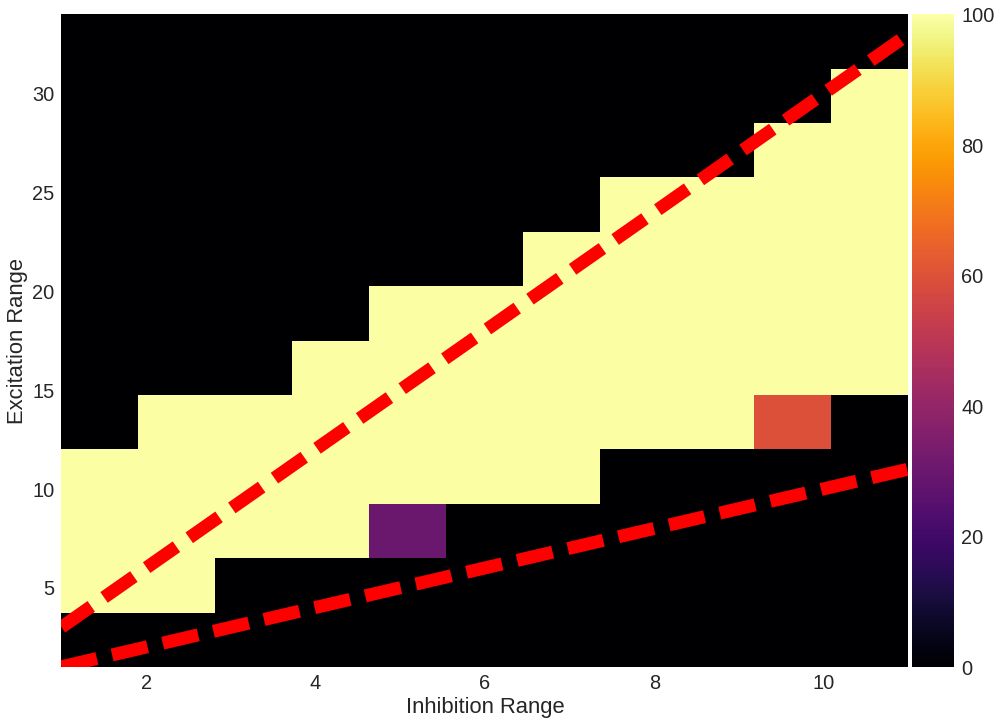

In [12]:
coefficient_1 = 1.0
coefficient_2  = 3.0
excitation_range_line_1 = coefficient_1 * inhibition_range
excitation_range_line_2 = coefficient_2 * inhibition_range


fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

cmap = 'inferno'

extent = [inhibition_range[0], inhibition_range[-1], excitation_range[0], excitation_range[-1]]
im = ax.imshow(success_matrix, origin='lower', cmap=cmap, interpolation='None', extent=extent, aspect='auto')
ln = ax.plot(inhibition_range, excitation_range_line_1, color='r', linestyle='--', lw=13)
ln = ax.plot(inhibition_range, excitation_range_line_2, color='r', linestyle='--', lw=13)
# im = ax.imshow(success_matrix, origin='lower', cmap=cmap, interpolation='None', aspect='auto')

ax.set_xlabel('Inhibition Range')
ax.set_ylabel('Excitation Range')

ax.grid()

divider1 = make_axes_locatable(ax)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax1, orientation='vertical');

Let's do two lines together.

In [13]:
def calculate_excitation_inhibition_ratio_artificial(value, inhibition, hypercolumns, minicolumns, n_patterns):
    
    excitation_normal = value * hypercolumns + value * (hypercolumns - 1)
    inhibition_normal = -1 * inhibition * hypercolumns * (minicolumns - 2)
    normal = ((n_patterns - 1.0) / n_patterns) * (excitation_normal / inhibition_normal)
    
    excitation_first = value * (hypercolumns - 1)
    inhibition_first = -1 * inhibition * hypercolumns * (minicolumns - 1)
    first = (1.0 / n_patterns) * (excitation_first / inhibition_first)
    
    return normal + first

In [ ]:
def excitation_from_value(value, hypercolumns, minicolumns, n_patterns):
    excitation_normal = value * hypercolumns + value * (hypercolumns - 1)
    normal = ((n_patterns - 1.0) / n_patterns) * (excitation_normal)
    
    excitation_first =  excitation_first = value * (hypercolumns - 1)
    first = (1.0 / n_patterns) * (excitation_first)
    
    excitation_total = normal + first
    
    return excitation_total

In [ ]:
def inhibition_from_value(inhibition, hypercolumns, minicolumns, n_patterns):
    inhibition_normal = -1 * inhibition * hypercolumns * (minicolumns - 2)
    normal = ((n_patterns - 1.0) / n_patterns) * (inhibition_normal)
    
    inhibition_first = -1 * inhibition * hypercolumns * (minicolumns - 1)
    first = (1.0 / n_patterns) * (inhibition_first)
    
    inhibition_total = normal + first
    
    return inhibition_total

In [14]:
ratios_matrix = np.zeros((excitation_range.size, inhibition_range.size))

for value_index, value in enumerate(excitation_range):
    print(value_index)
    for inhibition_index, inhibition in enumerate(inhibition_range):
        manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, -inhibition, extension, decay_factor,
                                            sequence_decay, dt, BCPNNFast, NetworkManager, ampa, beta)
        
        ratio, aux, aux = calculate_excitation_inhibition_ratio(manager.nn, sequences, ampa=False)
      
        ratios_matrix[value_index, inhibition_index] = ratio

0
1
2
3
4
5
6
7
8
9
10
11


In [15]:
ratio

0.27000551491930802

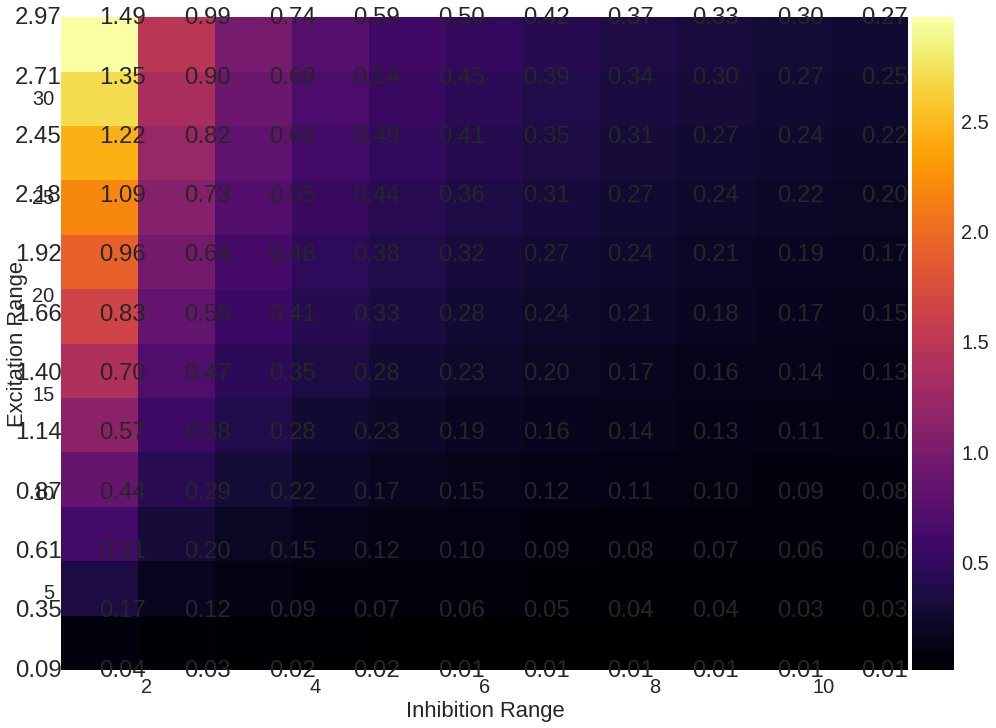

In [45]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

cmap = 'inferno'
for (i,j),label in np.ndenumerate(ratios_matrix):
    label = "{:4.2f}".format(label)
    index1 = inhibition_range[j] # + np.diff(inhibition_range).mean() * 0.5
    index2 = excitation_range[i] # + np.diff(excitation_range).mean() * 0.5
    ax.text(index1, index2, label, ha='right',va='center')
extent = [inhibition_range[0], inhibition_range[-1], excitation_range[0], excitation_range[-1]]
im = ax.imshow(ratios_matrix, origin='lower', cmap=cmap, interpolation='None', extent=extent, aspect='auto')
# im = ax.imshow(success_matrix, origin='lower', cmap=cmap, interpolation='None', aspect='auto')

ax.set_xlabel('Inhibition Range')
ax.set_ylabel('Excitation Range')

ax.grid()

divider1 = make_axes_locatable(ax)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax1, orientation='vertical');

In [64]:
sequences = [[i for i in range(n_patterns)]]

excitation_range = np.arange(1, 36, 3)
inhibition_range = np.arange(1, 12, 1)

aux_matrix = np.zeros((excitation_range.size, inhibition_range.size))
aux_matrix2 = np.zeros((excitation_range.size, inhibition_range.size))

for value_index, value in enumerate(excitation_range):
    print(value_index)
    for inhibition_index, inhibition in enumerate(inhibition_range):

        manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, -inhibition, extension, decay_factor,
                                            sequence_decay, dt, BCPNNFast, NetworkManager, ampa, beta)

        excitation, aux, aux = calculate_excitation(manager.nn, sequences, ampa=False)
        inhibition, aux, aux = calculate_inhibition(manager.nn, sequences, ampa=False)
        aux_matrix[value_index, inhibition_index] = excitation
        aux_matrix2[value_index, inhibition_index] = inhibition

0
1
2
3
4
5
6
7
8
9
10
11


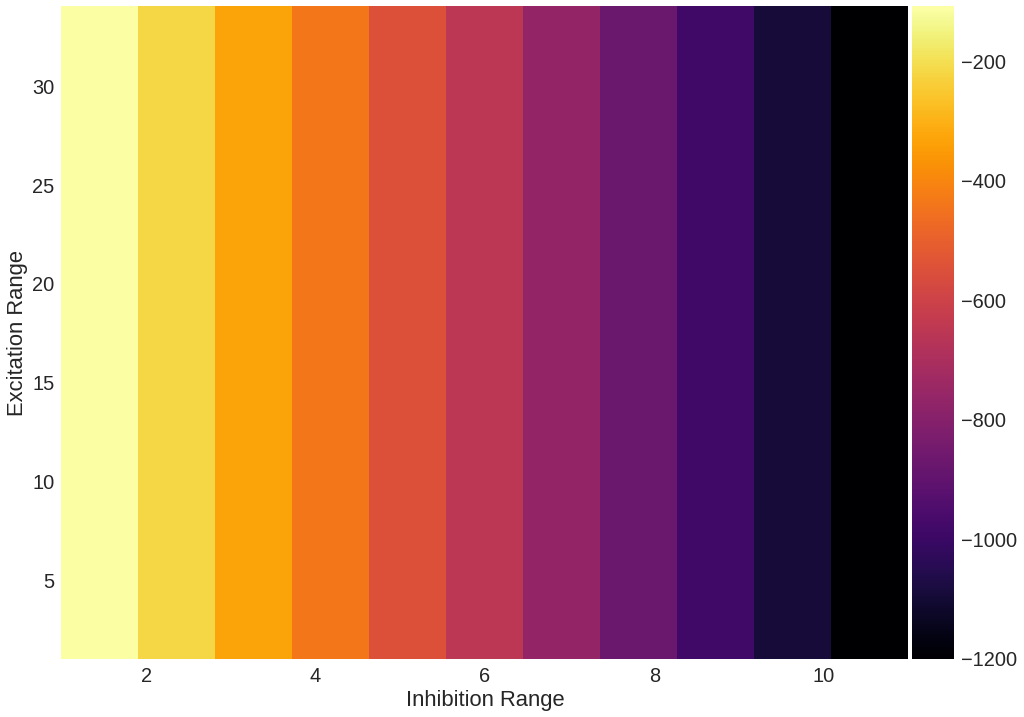

In [65]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

cmap = 'inferno'

extent = [inhibition_range[0], inhibition_range[-1], excitation_range[0], excitation_range[-1]]
im = ax.imshow(aux_matrix2, origin='lower', cmap=cmap, interpolation='None', extent=extent, aspect='auto')
# im = ax.imshow(success_matrix, origin='lower', cmap=cmap, interpolation='None', aspect='auto')

ax.set_xlabel('Inhibition Range')
ax.set_ylabel('Excitation Range')

ax.grid()

divider1 = make_axes_locatable(ax)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax1, orientation='vertical');

In [59]:
 manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, -inhibition, extension, decay_factor,
                                            sequence_decay, dt, BCPNNFast, NetworkManager, ampa, beta)

excitation, aux1, aux2 = calculate_excitation(manager.nn, sequences, ampa=False)

In [63]:
aux2
excitation_range

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34])

In [60]:
from plotting_functions import plot_weight_matrix

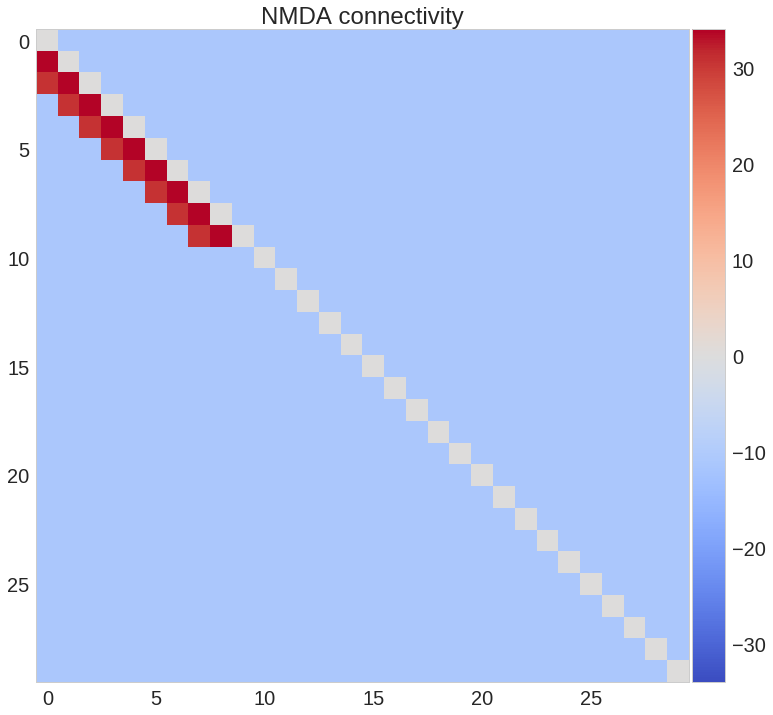

In [61]:
plot_weight_matrix(manager.nn)

#### Git machinery

In [7]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])